In [1]:
from data_reader import DataReader
import pickle
from supporter_countries import SupportModule
from ideology_and_objective import IdeologicalObjectiveModule
import numpy as np
from ideology_homophily_score import IdeologyHomophillyScore
from get_supporter_homophily_from_nag import SupporterHomophillyFromNAG
import pandas as pd
from get_longevity import LongevityModule

In [2]:
with open("pickles/long_horizon_list.pickle", "rb") as f:
    long_horizon_list = pickle.load(f)
    
with open("pickles/short_horizon_list.pickle", "rb") as f:
    short_horizon_list = pickle.load(f)

In [3]:
df = DataReader().get_pandas_df()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
sup_obj = SupportModule()
homo_obj = SupporterHomophillyFromNAG()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
def get_score(nagcode):
    num_lifespan_mean, denum_lifespan_mean = 0, 0
    support_list = sup_obj.get_supporter_from_NAGcode(nagcode)
    for support_code in support_list:
        info = homo_obj.get_lifespan_homophily(support_code)
        num_of_nags = info.get("num_of_nags")
        sup_duration_mean = info.get("sup_duration_mean")
        num_lifespan_mean += sup_duration_mean*num_of_nags
        denum_lifespan_mean += num_of_nags
    mean_of_means = num_lifespan_mean/denum_lifespan_mean if denum_lifespan_mean != 0 else np.nan
    data = {"NAGcode": nagcode, "num_of_supporters": len(support_list),
           "supporter_duration_mean": mean_of_means}
    return data

def get_score_direct(nagcode):
    num_lifespan_mean, denum_lifespan_mean = 0, 0
    duration_list = []
    for support_code in support_list:
        duration = sup_obj.get_active_support_duration(nagcode, support_code)
        duration_list.append(duration)
    data = {"NAGcode": nagcode, "num_of_supporters": len(support_list),
           "supporter_duration_mean": np.mean(duration_list),
           "supporter_duration_std": np.std(duration_list),}
    return data

columns= ["NAGcode", "num_of_supporters", "supporter_duration_mean"]
homophily_df = pd.DataFrame(columns=columns)
for nagcode in df['NAGcode_1'].unique():
    data = get_score(nagcode)
    t_df = pd.DataFrame(data, index=[0])
    homophily_df = homophily_df.append(t_df)

In [18]:
homophily_df[homophily_df['num_of_supporters']!=0]

,NAGcode,num_of_supporters,supporter_duration_mean
0,26,1,17.250000
0,301,3,9.508772
0,235,3,7.157895
0,345,1,4.750000
0,354,5,10.867925
...,...,...,...
0,510,1,10.958333
0,513,1,10.958333
0,552,3,12.295082
0,553,14,7.726776


In [19]:
long_homophily_df = pd.DataFrame(columns=columns)
for nagcode in long_horizon_list:
    data = get_score(nagcode)
    t_df = pd.DataFrame(data, index=[0])
    long_homophily_df = long_homophily_df.append(t_df)

In [40]:
short_homophily_df = pd.DataFrame(columns=columns)
for nagcode in short_horizon_list:
    data = get_score(nagcode)
    t_df = pd.DataFrame(data, index=[0])
    short_homophily_df = short_homophily_df.append(t_df)

In [38]:
def get_list(df):
    df = df[df['num_of_supporters']!=0]['supporter_duration_mean']
    return df.tolist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2182d2d6688>,
 'caps': [<matplotlib.lines.Line2D at 0x2182d2f6dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2182d2f6588>],
 'medians': [<matplotlib.lines.Line2D at 0x2182d2f8b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2182d2fdf08>],
 'means': []}

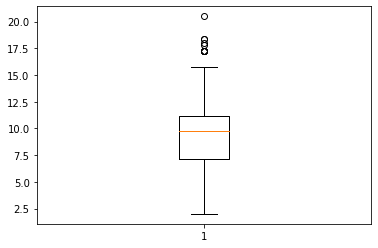

In [39]:
import matplotlib.pyplot as plt
plt.boxplot(get_list(long_homophily_df))

{'whiskers': [<matplotlib.lines.Line2D at 0x2182d354088>,
 'caps': [<matplotlib.lines.Line2D at 0x2182d374ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2182d374188>],
 'medians': [<matplotlib.lines.Line2D at 0x2182d376848>],
 'fliers': [<matplotlib.lines.Line2D at 0x2182d376cc8>],
 'means': []}

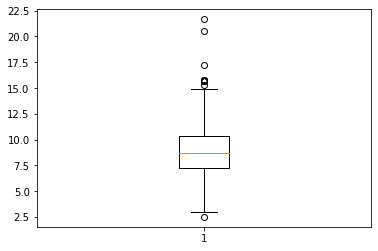

In [41]:
plt.boxplot(get_list(short_homophily_df))

In [22]:
def mean_of_means(df):
    num, denum = 0, 0
    for index, row in df.iterrows():
        s_mean, w = row['supporter_duration_mean'], row['num_of_supporters']
        if w != 0:
            num += s_mean*w
            denum += w
    return num/denum

In [23]:
mean_of_means(long_homophily_df)

9.90753587923776

In [27]:
mean_of_means(short_homophily_df)

9.056444940685923

In [30]:
# [long_homophily_df['num_of_supporters']!=0]
long_homophily_df.mean()

NAGcode                    243.096154
num_of_supporters            1.028846
supporter_duration_mean      9.836978
dtype: float64

In [31]:
# [short_homophily_df['num_of_supporters']!=0]
short_homophily_df.mean()

NAGcode                    304.606707
num_of_supporters            1.118902
supporter_duration_mean      9.159021
dtype: float64

In [12]:
l = [83, 121, 82, 147, 60]
w = [189, 46, 89, 40, 12]
num, denum = 0, 0
for i, j in zip(l,w):
    num += i*j
    denum += j
print(num, denum)
num/denum

35151 376


93.48670212765957